In [3]:
import re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests

## Extracting data from the url

In [4]:
## creating empty lists 
movie_name=[]
year=[]
runtime=[]
genre=[]
rating=[]
directors=[]
stars=[]
votes=[]
## looping through each page 
for page in range(1,2250,250):
    url=f"""https://www.imdb.com/search/title/?title_type=feature&release_date=2022-01-01,
    2023-04-01&countries=in&count=250&start={str(page)}&ref_=adv_nxt"""
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
    ## moviedata contains information about all the movies
    moviedata=soup.find_all("div",class_="lister-item-content")
    # looping through each movie
    for movie in moviedata:
        movie_name.append(movie.h3.a.text)
        year.append(movie.h3.find_all("span",class_="lister-item-year text-muted unbold")[0].text)
        rt=movie.p.find_all("span",class_="runtime")
        if rt==[]:
            runtime.append(np.nan)
        else:
            runtime.append(rt[0].text)
        gnr=movie.p.find_all("span",class_="genre")
        if gnr==[]:
            genre.append(np.nan)
        else:
            genre.append(gnr[0].text.strip())
        rtg=movie.find_all("div",class_="inline-block ratings-imdb-rating")
        if rtg==[]:
            rating.append(np.nan)
        else:
            rating.append(rtg[0].text.strip())
        di=movie.find('p', class_='').find('a')
        if di ==None:
            directors.append(np.nan)
        else:
            directors.append(di.text)
        star=[]
        sr=movie.find_all("p",class_="")[0].find_all("a")[-1:-5:-1]
        for i in sr:
            star.append(i.text)
        stars.append(star)
        vot=movie.find_all("p",class_="sort-num_votes-visible")
        if vot==[]:
            votes.append(np.nan)
        else:
            votes.append(vot[0].text.split()[1])
url="""https://www.imdb.com/search/title/?title_type=feature&release_date=2022-01-01,
    2023-04-01&countries=in&count=248&start=2251&ref_=adv_nxt"""
page=requests.get(url)
soup=BeautifulSoup(page.text)
moviedata=soup.find_all("div",class_="lister-item-content")
for movie in moviedata:
    movie_name.append(movie.h3.a.text)
    year.append(movie.h3.find_all("span",class_="lister-item-year text-muted unbold")[0].text)
    rt=movie.p.find_all("span",class_="runtime")
    if rt==[]:
        runtime.append(np.nan)
    else:
        runtime.append(rt[0].text)
    gnr=movie.p.find_all("span",class_="genre")
    if gnr==[]:
        genre.append(np.nan)
    else:
        genre.append(gnr[0].text.strip())
    rtg=movie.find_all("div",class_="inline-block ratings-imdb-rating")
    if rtg==[]:
            rating.append(np.nan)
    else:
        rating.append(rtg[0].text.strip())
    di=movie.find('p', class_='').find('a')
    if di ==None:
        directors.append(np.nan)
    else:
        directors.append(di.text)
    star=[]
    sr=movie.find_all("p",class_="")[0].find_all("a")[-1:-5:-1]
    for i in sr:
        star.append(i.text)
    stars.append(star)
    vot=movie.find_all("p",class_="sort-num_votes-visible")
    if vot==[]:
        votes.append(np.nan)
    else:
        votes.append(vot[0].text.split()[1])



## Creating a Dataframe of extracted data

In [5]:
## Creating a data frame
df=pd.DataFrame({"Movie_Name":movie_name,
                 "year":year,
                 "runtime":runtime,
                 "genre":genre,
                 "Rating":rating,
                 "director":directors,
                 "stars":stars,
                "Votes":votes})

## Data Cleaning 

In [6]:
## Data cleaning 
yea=[]
for i in df["year"]:
    if type(i)==float:
        yea.append(np.nan)
    else:
        if len(i)<=6:
            yea.append(i.replace("(","").replace(")",""))
        else:
            yea.append(i.strip()[4:].replace("(","").replace(")",""))
eay=[]
for i in yea:
    if type(i)==float:
        eay.append(np.nan)
    else:
        eay.append(i.strip())
df["year"]=eay
df["year"]=df["year"].replace({"I":"2022",
                               "VIII":"2022","III":"2022",
                               "IV":"2022","II":"2022",
                               "X":"2022",
                              "VII":"2022","V":"2022",
                              "VI":"2022","IX":"2022","LXII":"2022"})
df=df[df["year"]!="2024"]
df=df[df["year"]!="2025"]
df=df[df["year"]!="2026"]
df=df[df["year"]!="2027"]
df=df[df["year"]!=""]
df["year"]=df["year"].astype("int")
runt=[]
for i in df["runtime"]:
    if type(i)==float:
        runt.append(np.nan)
    else:
        runt.append(i.replace("min","").strip())
df["runtime"]=runt
df["runtime"].value_counts()
df["runtime"].mode()[0]
df["runtime"].fillna(df["runtime"].mode()[0],inplace=True)
df["runtime"]=df["runtime"].replace({"5,538":"120"})
df["runtime"]=df["runtime"].astype("int")
rating=[]
for i in df["Rating"]:
    if i==float:
        rating.append(np.nan)
    else:
        rating.append(float(i))
df["Rating"]=rating
df["Rating"].fillna(round(df["Rating"].mean(),1),inplace=True)
vote=[]
for i in df["Votes"]:
    if type(i)!=float:
        i=i.replace(",","")
        vote.append(int(i))
    else:
        vote.append(np.nan)
df["Votes"]=vote
df["Votes"].fillna(round(df["Votes"].mean(),),inplace=True)
df["Votes"]=df["Votes"].astype("int")
df["genre"].fillna(df["genre"].mode()[0],inplace=True)
gen=[]
for i in df["genre"]:
    if len(i)>9:
        gen.append(i.split(",")[0])
    else:
        gen.append(i)
df["genre"]=gen
## director column has 3 missing values,dropped
df.dropna(inplace=True)
#reverse list of star names 
starr=[]
for i in df["stars"]:
    i=list(i)
    i.reverse()
    starr.append(i)
df["stars"]=starr
rat=[]
for i in df["Rating"]:
    rat.append(round(i,1))
df["Rating"]=rat
df=df[df["Movie_Name"]!="Adipurush"]
df=df[df["Movie_Name"]!="Hanu Man"]
df.reset_index(drop=True,inplace=True)

## Univariate Analysis

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

### Display the Count of movies relesed in each genre

<function matplotlib.pyplot.show(close=None, block=None)>

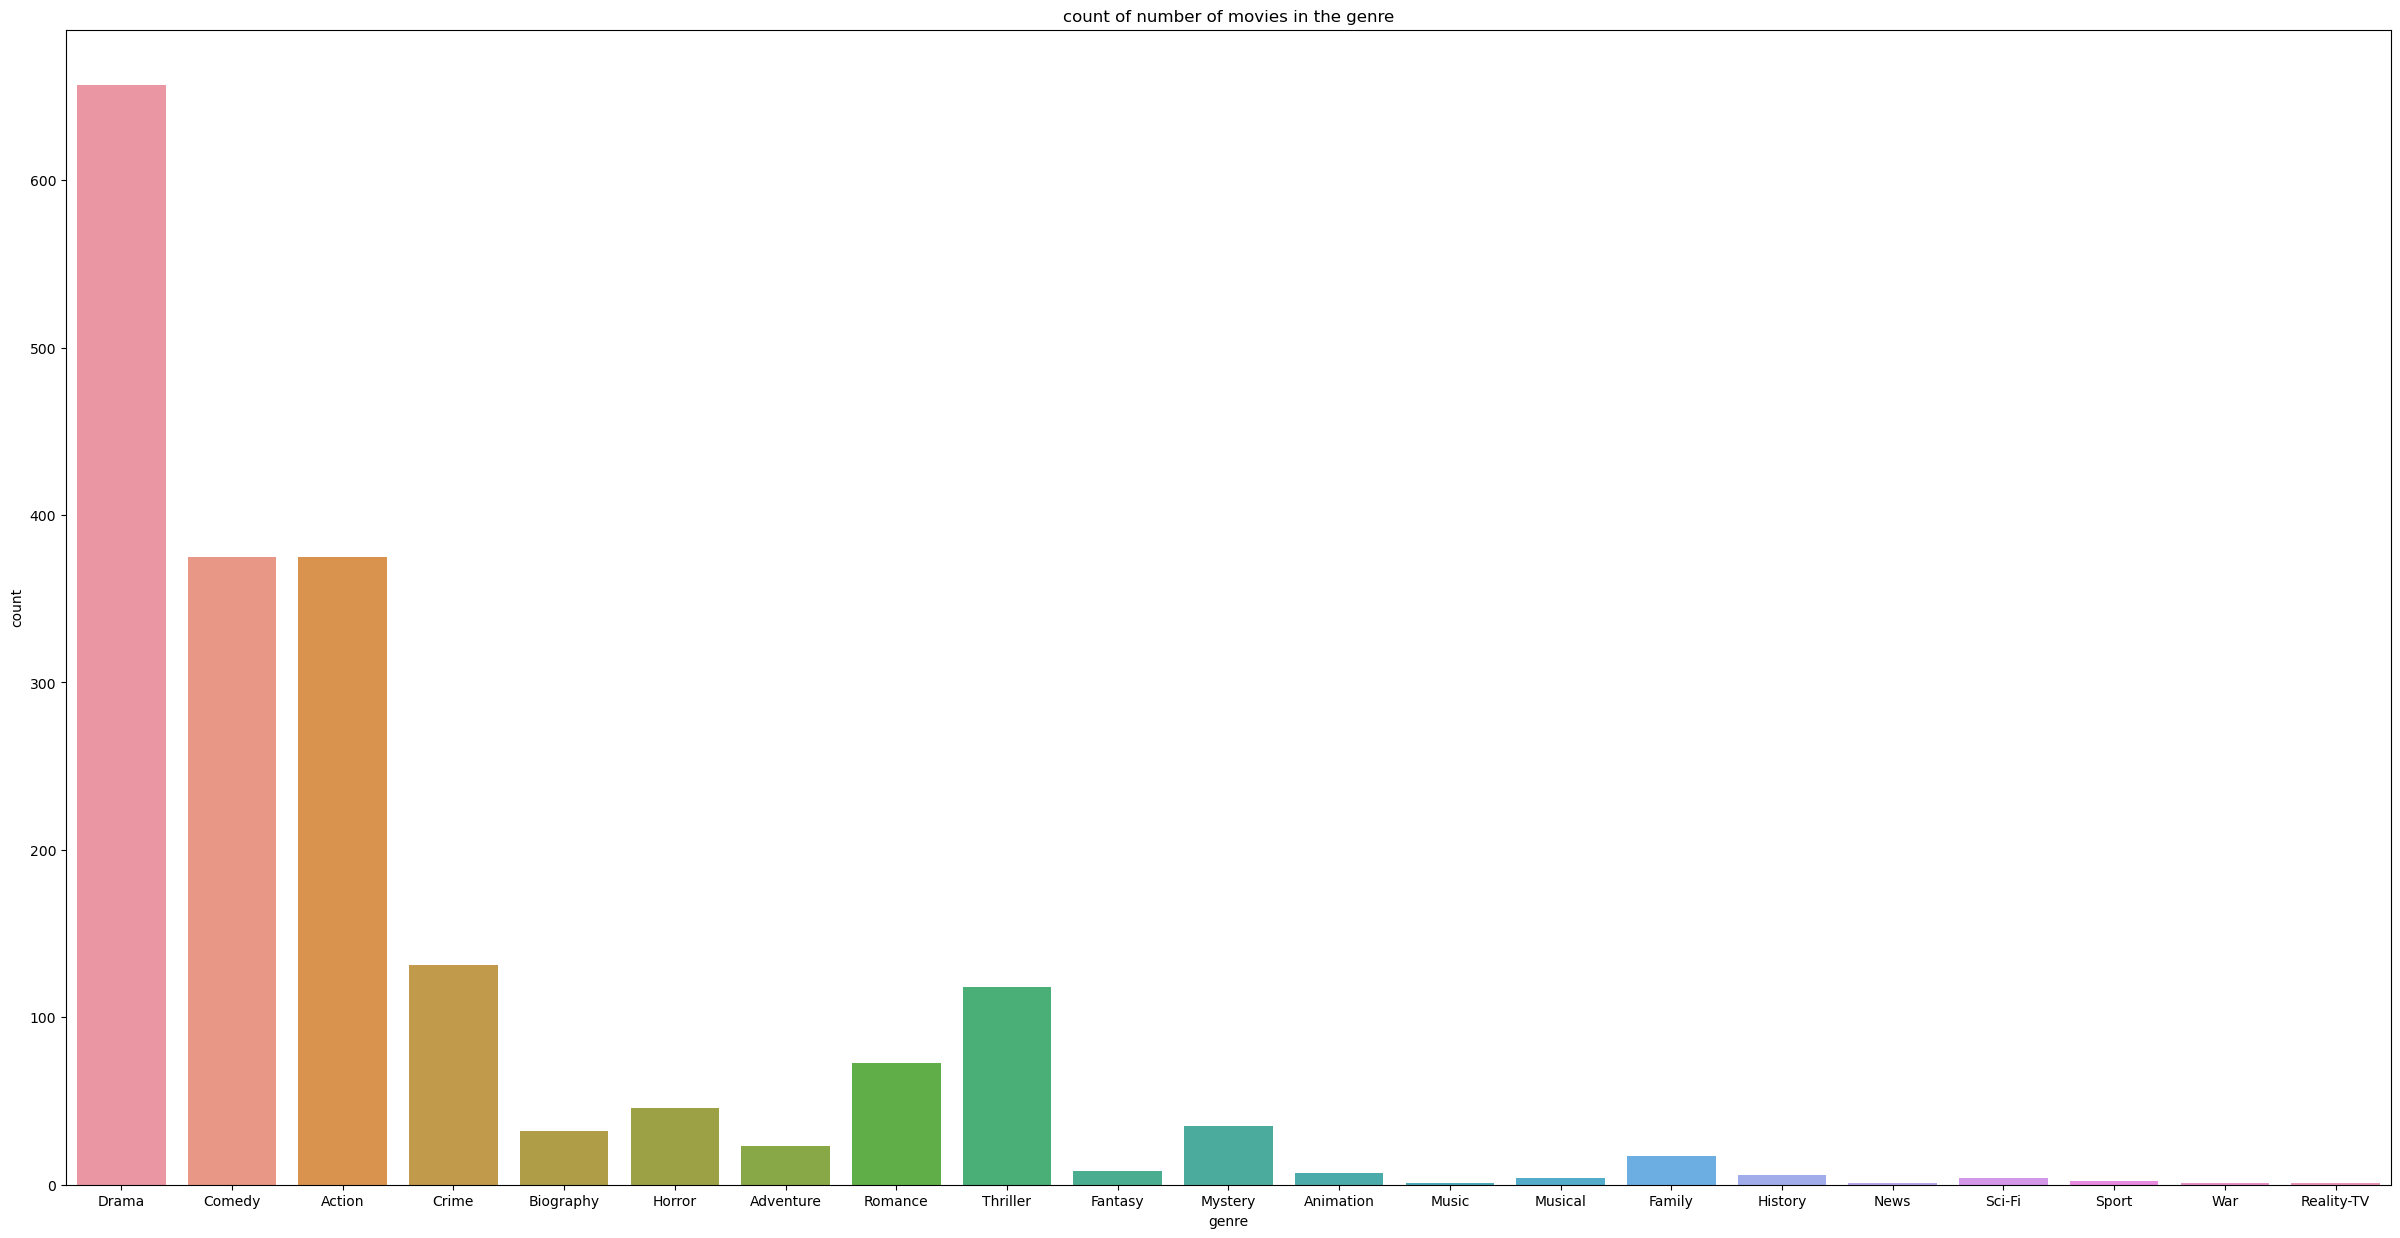

In [8]:
plt.figure(figsize=(30,15))
sns.countplot(x="genre",data=df)
plt.title("count of number of movies in the genre")
plt.show

### Display the count of movies relesed in a year

<function matplotlib.pyplot.show(close=None, block=None)>

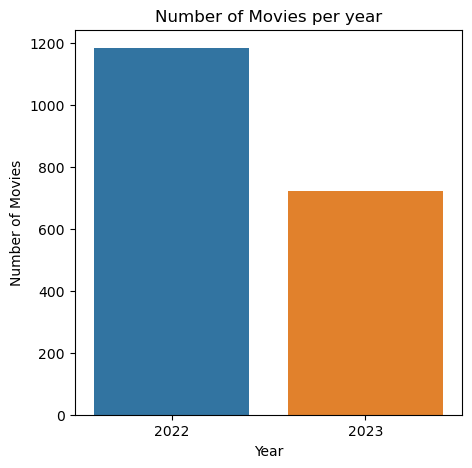

In [129]:
plt.figure(figsize=(5,5))
sns.countplot(x="year",data=df)
plt.title("Number of Movies per year")
plt.ylabel("Number of Movies")
plt.xlabel("Year")
plt.show

### Display the Percentage of movies relesed in a year

<AxesSubplot:ylabel='year'>

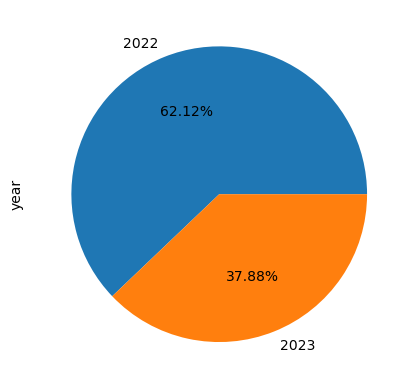

In [131]:
df["year"].value_counts().plot.pie(autopct="%.2f%%")

### Display the Average runtime 

<AxesSubplot:xlabel='runtime', ylabel='Density'>

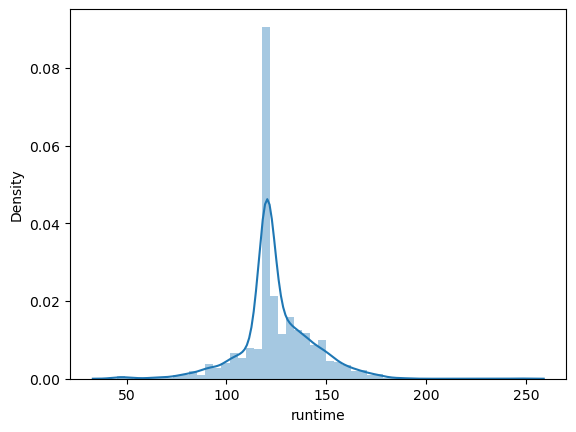

In [53]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df["runtime"])

### Display the Average of Rating

<AxesSubplot:xlabel='Rating', ylabel='Density'>

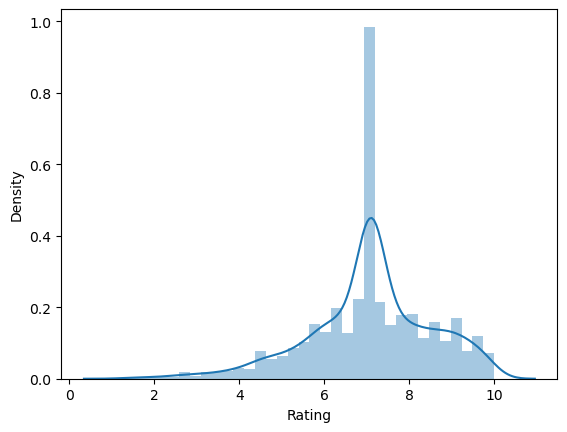

In [51]:
sns.distplot(df["Rating"])

### Display the mean of Runtime and find outliers in Runtime

<AxesSubplot:xlabel='runtime'>

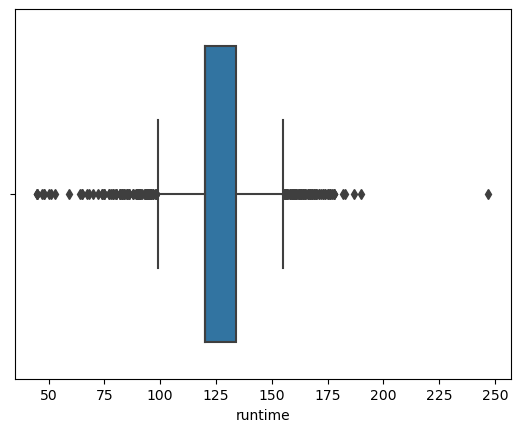

In [52]:
sns.boxplot(df["runtime"])

### Display the count of movies made by each director

In [9]:
df["director"].value_counts()

Smeep Kang               4
Shaji Kailas             4
Jeethu Joseph            4
Srijit Mukherji          4
Digpal Lanjekar          3
                        ..
Raajaselvam              1
Rahhat Shah Kazmi        1
Chhetan Gurung           1
Vimal Krishna            1
Mohinder Pratap Singh    1
Name: director, Length: 1728, dtype: int64

## Bivariate Analysis

In [43]:
dfvotsort=df.sort_values('Votes', ascending=False).head(10)

### Display Top 10 Highly Voted Movies and Number of votes

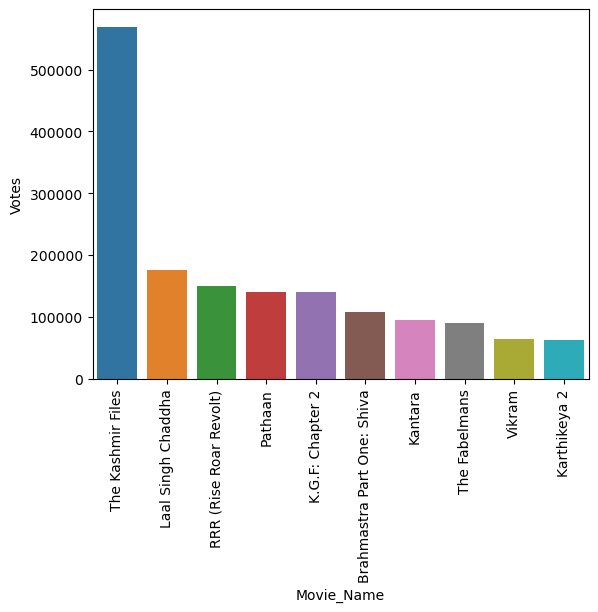

In [44]:
sns.barplot(x='Movie_Name', y='Votes', data=dfvotsort)
plt.xticks(rotation = 90)
plt.show()

## Display the Genre of top 10 highly rated Movies

<AxesSubplot:xlabel='genre', ylabel='Movie_Name'>

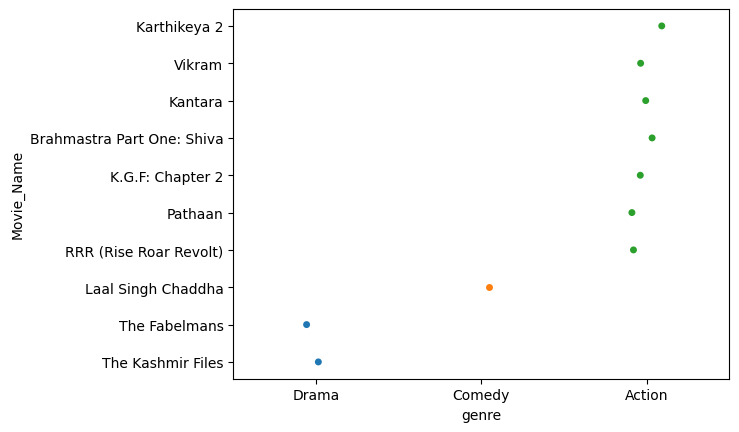

In [45]:
sns.stripplot(data=dfvotsort, x='genre',y='Movie_Name')

## Display how each genre is Rated

In [46]:
pd.crosstab(index=df["genre"],columns=df["Rating"]).head(10)

Rating,1.3,1.5,1.6,1.8,1.9,2.1,2.2,2.3,2.4,2.5,...,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0
genre,,,,,,,,,,,,,,,,,,,,,
Action,0,0,0,1,0,0,0,0,0,1,...,5,2,2,2,1,2,2,3,4,0
Adventure,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Animation,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,3,1,0,0,2,0,0,1,0,0
Comedy,1,1,1,0,1,1,1,0,1,0,...,1,2,1,4,1,7,0,1,3,0
Crime,0,0,0,0,0,0,0,1,0,0,...,3,2,1,1,2,1,3,0,3,0
Drama,0,0,0,0,0,0,0,0,0,0,...,14,13,11,9,7,9,6,5,5,3
Family,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Average Rating for each director

In [40]:
df.groupby("director")["Rating"].mean().sort_values(ascending=False)

director
Vivek Sharma               10.0
Hardeik Rathore            10.0
Ullas Shankar              10.0
Amanmeet Singh             10.0
Suresh Gopal                9.9
                           ... 
Shaad Ali                   2.1
Debaditya Bandyopadhyay     1.9
Rathod Raams                1.8
Anirban Chakraborty         1.6
Gippy Grewal                1.3
Name: Rating, Length: 1727, dtype: float64

## Multi  Variate Analysis

### Display Top 14 Highest rated movies with its director

In [38]:
top_high_rated_titles=df.nlargest(14,"Rating")[["Movie_Name","Rating","director"]].set_index("Movie_Name")
top_high_rated_titles

,Rating,director
Movie_Name,,
Mera Baba Nanak,10.0,Amanmeet Singh
1982 Anbarasin Kaadhal,10.0,Ullas Shankar
Chal Zindagi,10.0,Vivek Sharma
Shubh Yatra,10.0,Manish Saini
Jaishree Krishh,10.0,Hardeik Rathore
Theerkadarishi,9.9,P.G. Mohan
Fouja,9.9,Pramod Kumar
Yaaran Diyan Poun Baaran,9.9,Upasana Singh
1888,9.9,Sourabh Shukla


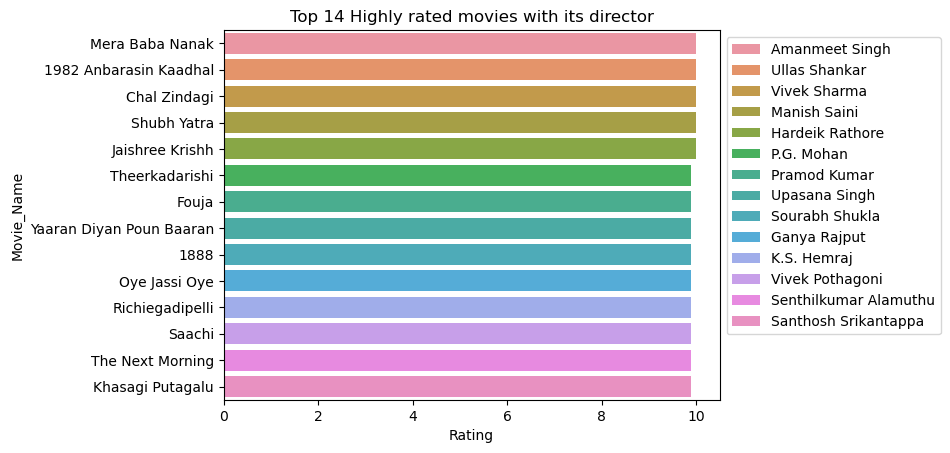

In [39]:
sns.barplot(x="Rating",y=top_high_rated_titles.index,data=top_high_rated_titles,hue="director",dodge=False)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.title("Top 14 Highly rated movies with its director")
plt.show()

### Display the relation between Votes, Runtime and Rating

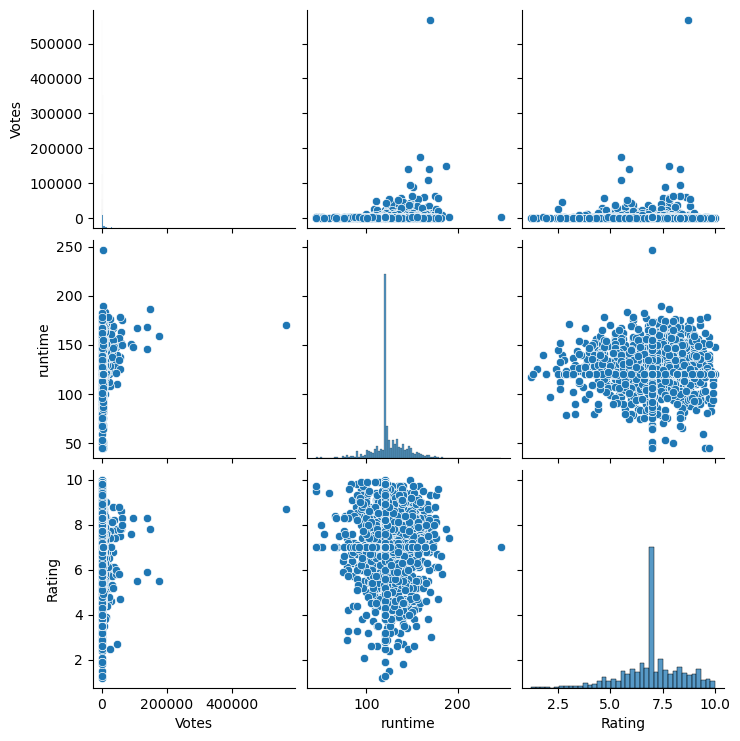

In [149]:
sns.pairplot(data=df,vars=["Votes","runtime","Rating"])
plt.show()

### Display the co-relation between Runtime, Rating and Votes

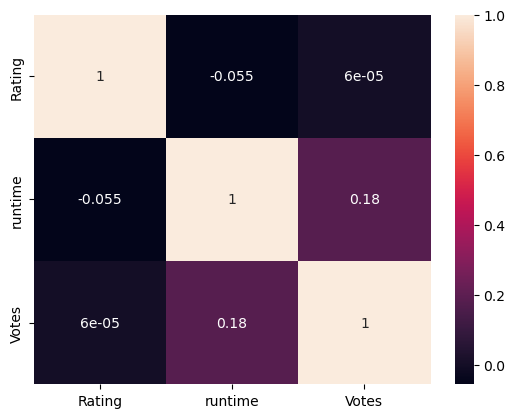

In [150]:
sns.heatmap(df[["Rating","runtime","Votes"]].corr(),annot=True)
plt.show()

### Display the Co-relation between all the numerical Columns

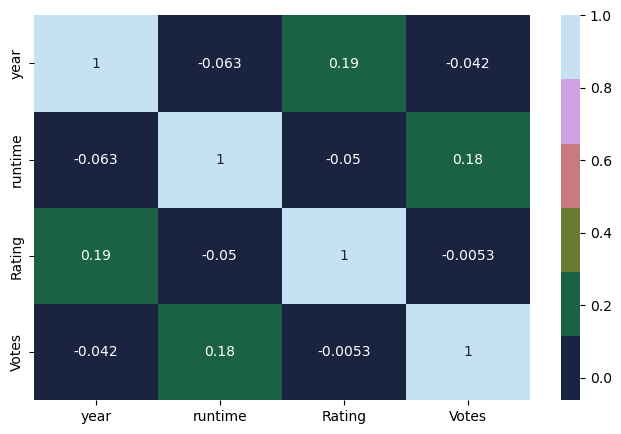

In [49]:
plt.figure(figsize=(8,5))
colours=sns.color_palette("cubehelix")
sns.heatmap(df.corr(),annot=True,cmap=colours)
plt.show()

In [14]:
df

,Movie_Name,year,runtime,genre,Rating,director,stars,Votes
0,The Fabelmans,2022,151,Drama,7.6,Steven Spielberg,"[Michelle Williams, Gabriel LaBelle, Paul Dano...",90961
1,The Kerala Story,2023,138,Drama,7.4,Sudipto Sen,"[Adah Sharma, Yogita Bihani, Sonia Balani, Sid...",59726
2,Bhediya,2022,156,Comedy,7.0,Amar Kaushik,"[Varun Dhawan, Kriti Sanon, Abhishek Banerjee,...",18371
3,Sirf Ek Bandaa Kaafi Hai,2023,132,Action,7.6,Apoorv Singh Karki,"[Manoj Bajpayee, Surya Mohan Kulshreshtha, Jai...",15902
4,Operation Mayfair,2023,116,Crime,2.3,Sudipto Sarkar,"[Jimmy Shergill, Hritiqa Chheber, Sammy Jonas ...",652
...,...,...,...,...,...,...,...,...
1912,Kadala Theerada Bhargava,2023,120,Thriller,8.7,Pannaga Somashekar,"[Bharath Gowda, Ashwin Hassan, Nalin Kumar, Ra...",1054
1913,A Journey to Kasi,2023,127,Drama,7.3,Munikishna,"[Akshara, Katalyn Gowda, Chaitanya Madadi, Pri...",2045
1914,Bobby Aur Rishi Ki Love Story,2022,120,Romance,7.1,Kunal Kohli,"[Nisha Aaliya, Rakesh Agrawal, Cindy Bamrah, H...",3368
1915,Shivamma,2022,104,Drama,5.7,Jaishankar Aryar,"[Jaishankar Aryar, Sharanamma Chetti, Chennamm...",11


In [17]:
df

,Movie_Name,year,runtime,genre,Rating,director,stars,Votes
0,The Fabelmans,2022,151,Drama,7.6,Steven Spielberg,"[Michelle Williams, Gabriel LaBelle, Paul Dano...",90961
1,The Kerala Story,2023,138,Drama,7.4,Sudipto Sen,"[Adah Sharma, Yogita Bihani, Sonia Balani, Sid...",59726
2,Bhediya,2022,156,Comedy,7.0,Amar Kaushik,"[Varun Dhawan, Kriti Sanon, Abhishek Banerjee,...",18371
3,Sirf Ek Bandaa Kaafi Hai,2023,132,Action,7.6,Apoorv Singh Karki,"[Manoj Bajpayee, Surya Mohan Kulshreshtha, Jai...",15902
4,Operation Mayfair,2023,116,Crime,2.3,Sudipto Sarkar,"[Jimmy Shergill, Hritiqa Chheber, Sammy Jonas ...",652
...,...,...,...,...,...,...,...,...
1912,Kadala Theerada Bhargava,2023,120,Thriller,8.7,Pannaga Somashekar,"[Bharath Gowda, Ashwin Hassan, Nalin Kumar, Ra...",1054
1913,A Journey to Kasi,2023,127,Drama,7.3,Munikishna,"[Akshara, Katalyn Gowda, Chaitanya Madadi, Pri...",2045
1914,Bobby Aur Rishi Ki Love Story,2022,120,Romance,7.1,Kunal Kohli,"[Nisha Aaliya, Rakesh Agrawal, Cindy Bamrah, H...",3368
1915,Shivamma,2022,104,Drama,5.7,Jaishankar Aryar,"[Jaishankar Aryar, Sharanamma Chetti, Chennamm...",11


In [18]:
df.to_csv("IMDB_Movies.csv")